# Graduate Admission

    The dataset contains several parameters which are considered important during the application for Masters Programs.
    The parameters included are :

        GRE Scores ( out of 340 )
        TOEFL Scores ( out of 120 )
        University Rating ( out of 5 )
        Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
        Undergraduate GPA ( out of 10 )
        Research Experience ( either 0 or 1 )
        Chance of Admit ( ranging from 0 to 1 )
        Acknowledgements

In [26]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [27]:
# Loading the dataset!
df = pd.read_csv('dataset/Admission_Predict.csv')
df.head()

,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


#### Basic EDA

In [28]:
df.shape

(500, 8)

In [29]:
df.isna().sum()

GRE                  0
TOEFL                0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admit                0
dtype: int64

In [30]:
df.describe()

,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


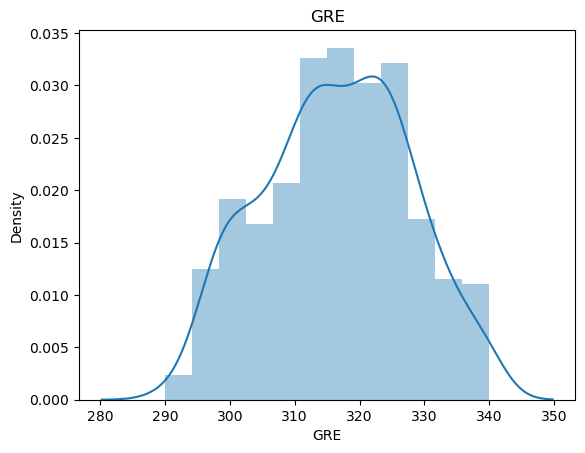

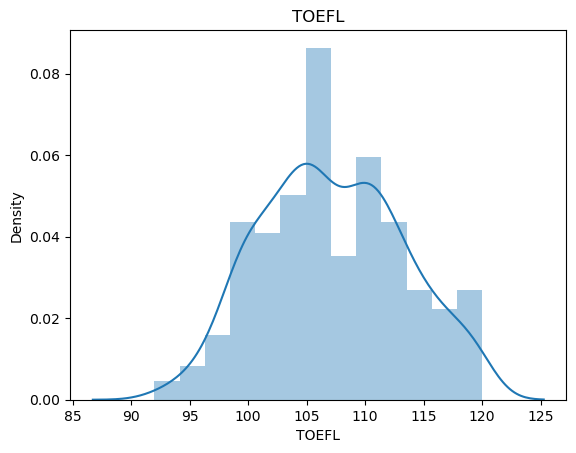

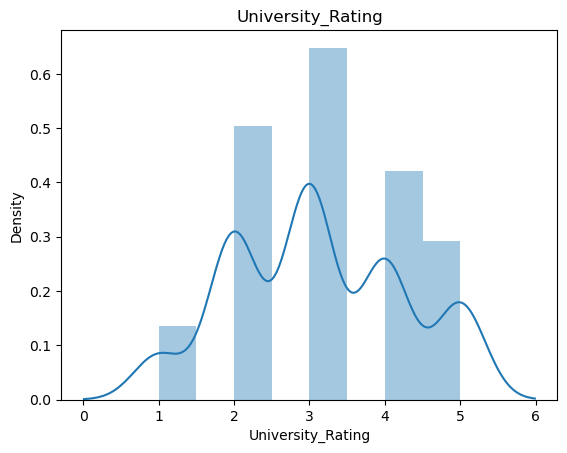

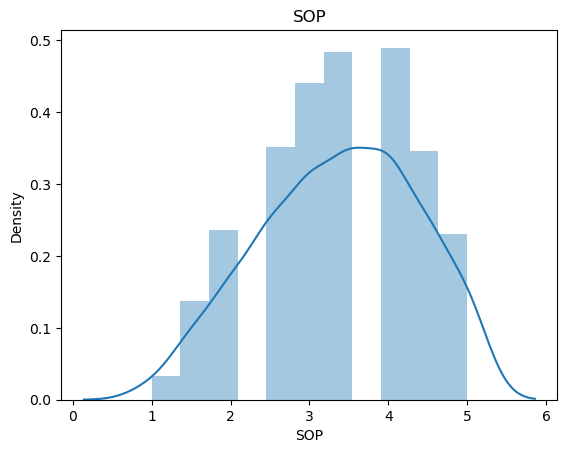

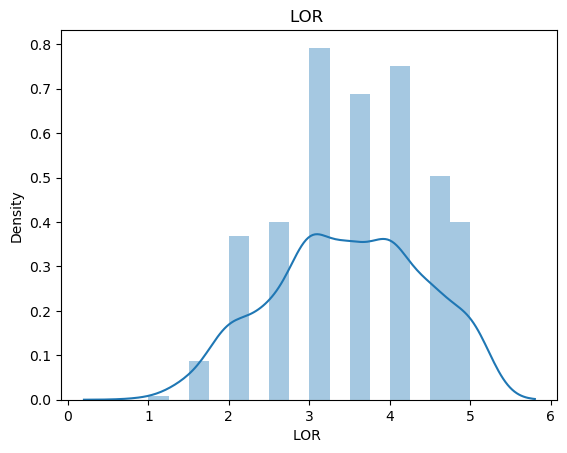

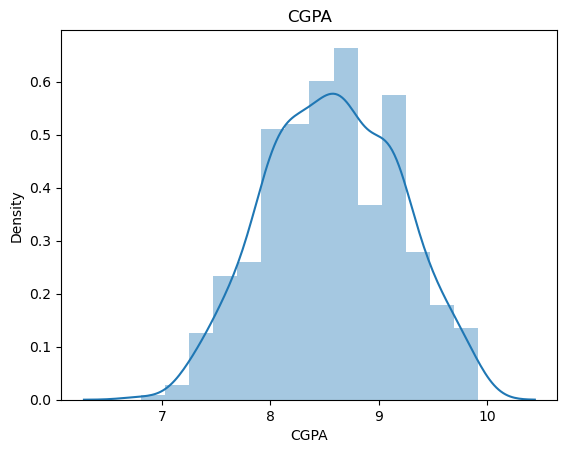

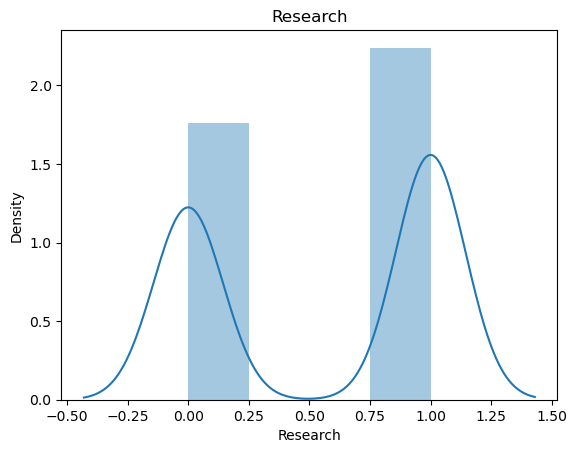

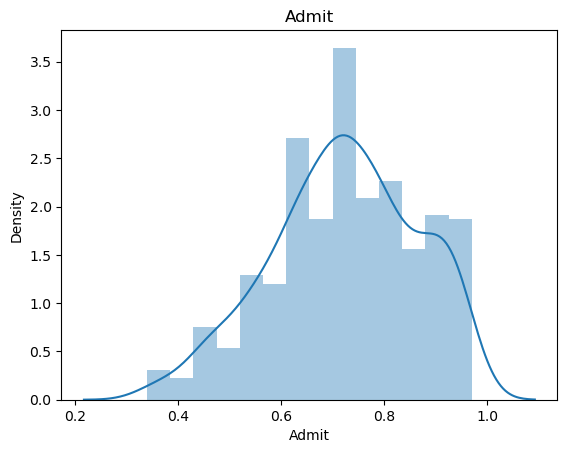

In [31]:
for col in df.columns:
    sns.distplot(df[col])
    plt.title(col)
    plt.show()

In [32]:
df[df.duplicated()]

,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Admit


In [33]:
dfcy = df.copy()

In [34]:
dfcy['Research'].value_counts()

Research
1    280
0    220
Name: count, dtype: int64

In [35]:
df[dfcy['Admit'] >= 0.75]['Admit'].count()

218

In [48]:
dfcy['Admit'] = dfcy['Admit'].apply(lambda x: 1 if x >= 0.75 else 0)

In [54]:
dfcy.to_csv('dataset/Admit.csv')

# Model Built

In [50]:
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [52]:
X

,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,1
496,337,117,5,5.0,5.0,9.87,1,1
497,330,120,5,4.5,5.0,9.56,1,1
498,312,103,4,4.0,5.0,8.43,0,0


In [53]:
X = dfcy.drop(['Admit'], axis = 1)
y = dfcy['Admit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

logistic_model = LogisticRegression().fit(X_train, y_train)

y_test_predicted = logistic_model.predict(X_test)

print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        92
           1       0.81      0.90      0.85        58

    accuracy                           0.88       150
   macro avg       0.87      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150



In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
logistic_model = LogisticRegression().fit(X_train, y_train)

# Define the hyperparameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100,150,200,250],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga']  # Solver options
}

# Create a GridSearchCV instance with cross-validation
grid_search = GridSearchCV(
    logistic_model,  # Estimator (Logistic Regression)
    param_grid,       # Parameter grid to search
    cv=5,             # Number of cross-validation folds
    scoring='accuracy',  # Evaluation metric (e.g., accuracy)
    verbose=1,        # Verbosity level (1 for progress output)
    n_jobs=-1          # Number of CPU cores to use (-1 for all available cores)
)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model with the best hyperparameters
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
final_logistic_model = LogisticRegression(C= 100, penalty= 'l1', solver='liblinear').fit(X_train, y_train)

y_test_predicted = final_logistic_model.predict(X_test)

print(classification_report(y_test, y_test_predicted))

In [ ]:
probs = final_logistic_model.predict_proba(X_test)

# Set custom threshold
threshold = 0.79
preds = (probs[:, 1] > threshold).astype(int)

# Evaluate model performance
accuracy = (preds == y_test).mean()
accuracy

### Cohen's Kappa score

In [ ]:
from sklearn.metrics import cohen_kappa_score

# True labels (ground truth)
true_labels = y_test

# Predicted labels (model's predictions)
predicted_labels = y_test_predicted

# Calculate Cohen's Kappa score
kappa_score = cohen_kappa_score(true_labels, predicted_labels)

print("Cohen's Kappa Score:", kappa_score)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

_pred_prob = final_logistic_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_predicted)

# Calculate the AUC (Area Under the Curve) score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()